## Loading, Pre-Processing & Visualisation 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file('diabetes_scale.txt')
# Convert sparse matrix to dense array}
X = X.toarray()
y = np.where(y > 0, 1, 0)
column_names = [f'Feature_{i}' for i in range(1, X.shape[1] + 1)]
df = pd.DataFrame(X, columns=column_names)
df['Label'] = y
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  768 non-null    float64
 1   Feature_2  768 non-null    float64
 2   Feature_3  768 non-null    float64
 3   Feature_4  768 non-null    float64
 4   Feature_5  768 non-null    float64
 5   Feature_6  768 non-null    float64
 6   Feature_7  768 non-null    float64
 7   Feature_8  768 non-null    float64
 8   Label      768 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 51.1 KB
None


In [5]:
df.isna().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Label        0
dtype: int64

#### Histograms of Feature Distributions

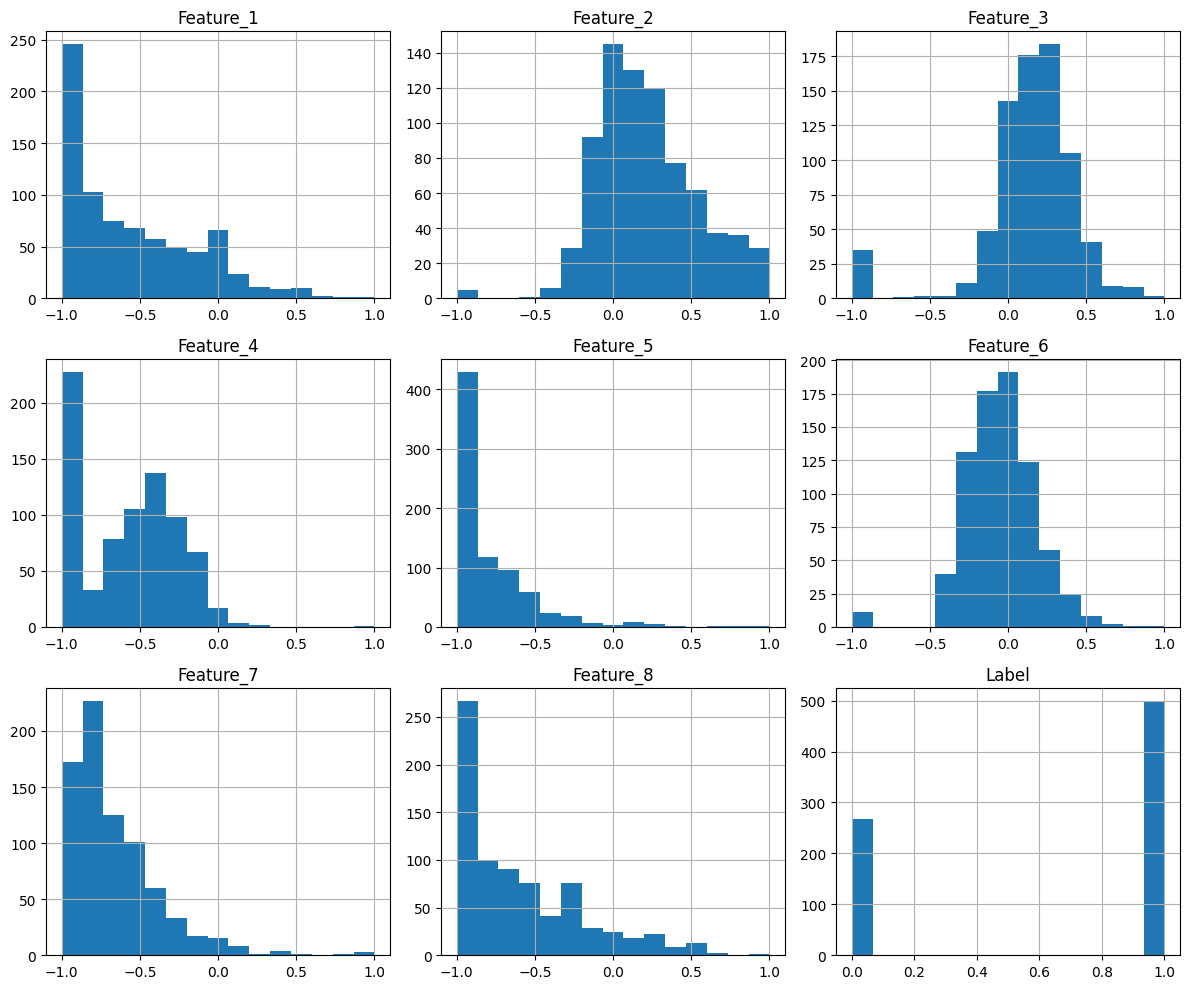

In [6]:
# Plot histograms for all features
df.hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()


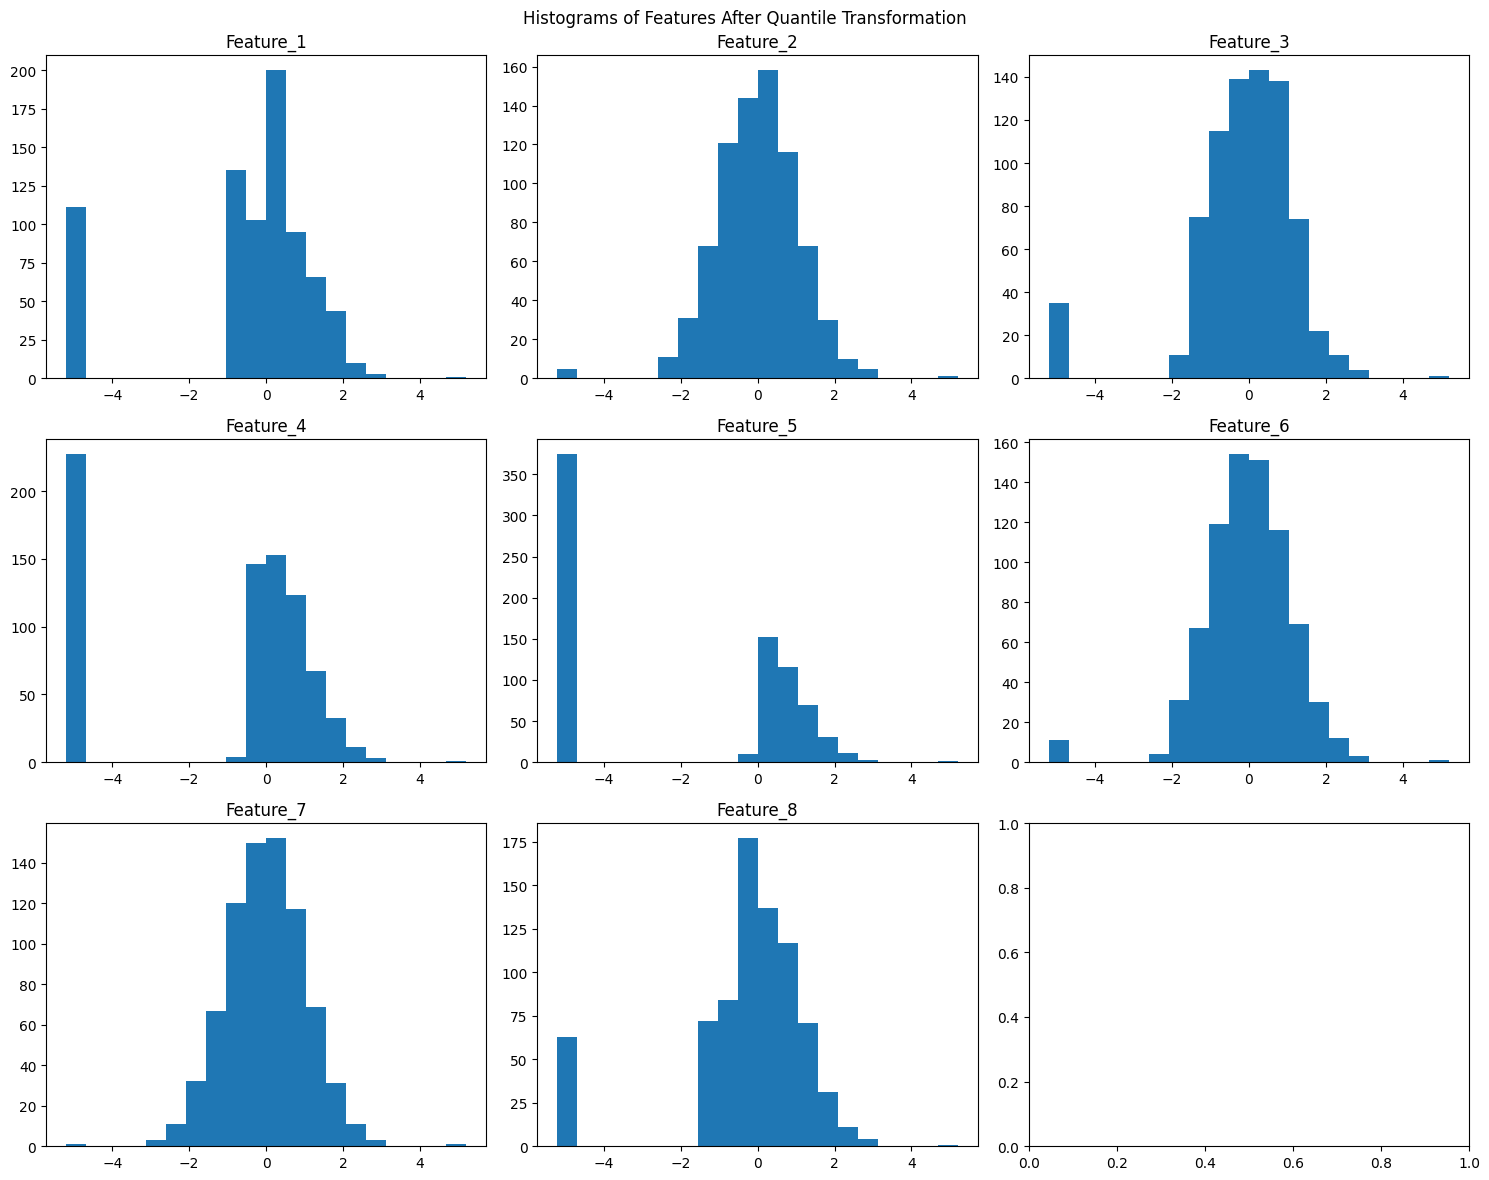

In [12]:
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import matplotlib.pyplot as plt

# Apply Quantile Transformation with a reduced number of quantiles
qt = QuantileTransformer(n_quantiles=768, output_distribution='normal')  # n_quantiles = sample size

# Transform the data (except the label column)
df_quantile_scaled = pd.DataFrame(qt.fit_transform(df.iloc[:, :-1]), 
                                  columns=df.columns[:-1])  # Fix column names

# Add the label column back to the scaled dataframe
df_quantile_scaled['Label'] = df['Label']

# Plot histograms of the scaled features
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
axs = axs.ravel()

for i, col in enumerate(df_quantile_scaled.columns[:-1]):  # Exclude 'Label' column
    axs[i].hist(df_quantile_scaled[col], bins=20)
    axs[i].set_title(col)

plt.suptitle("Histograms of Features After Quantile Transformation")
plt.tight_layout()
plt.show()


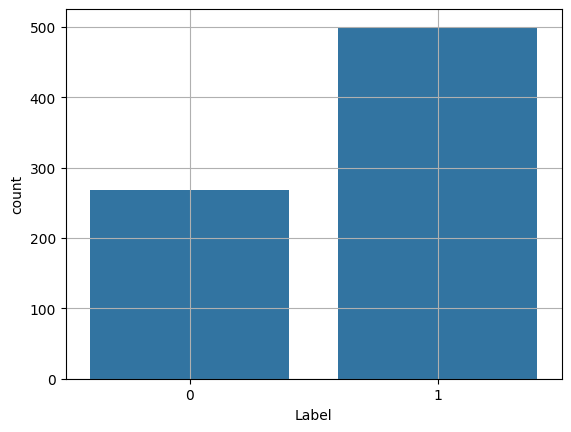

In [13]:
cols = df_quantile_scaled.columns.tolist()
sns.countplot(x = 'Label', data = df_quantile_scaled)
plt.grid()

#### Correlation Heatmap

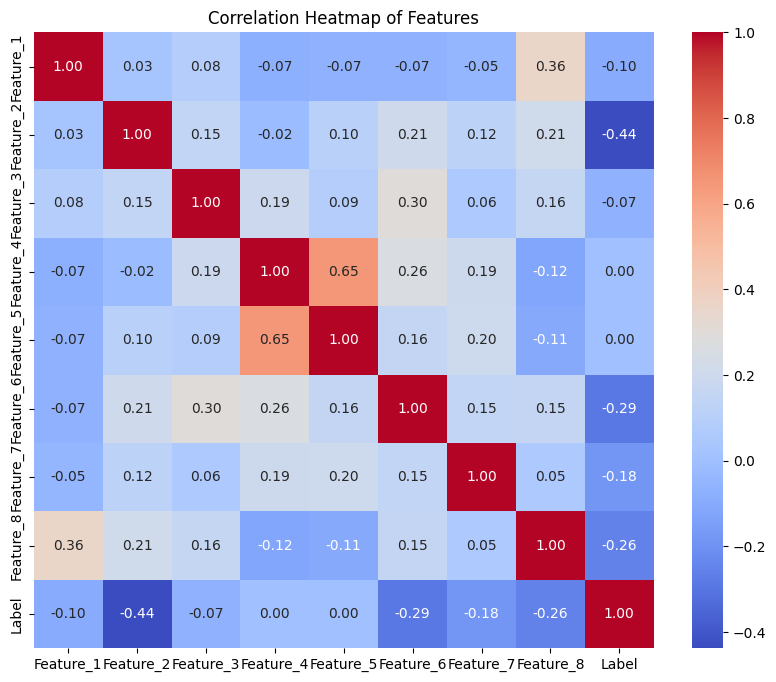

In [14]:
corr_matrix = df_quantile_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

## Pairplot for Feature Interaction

#### Berfore Quantile transformation

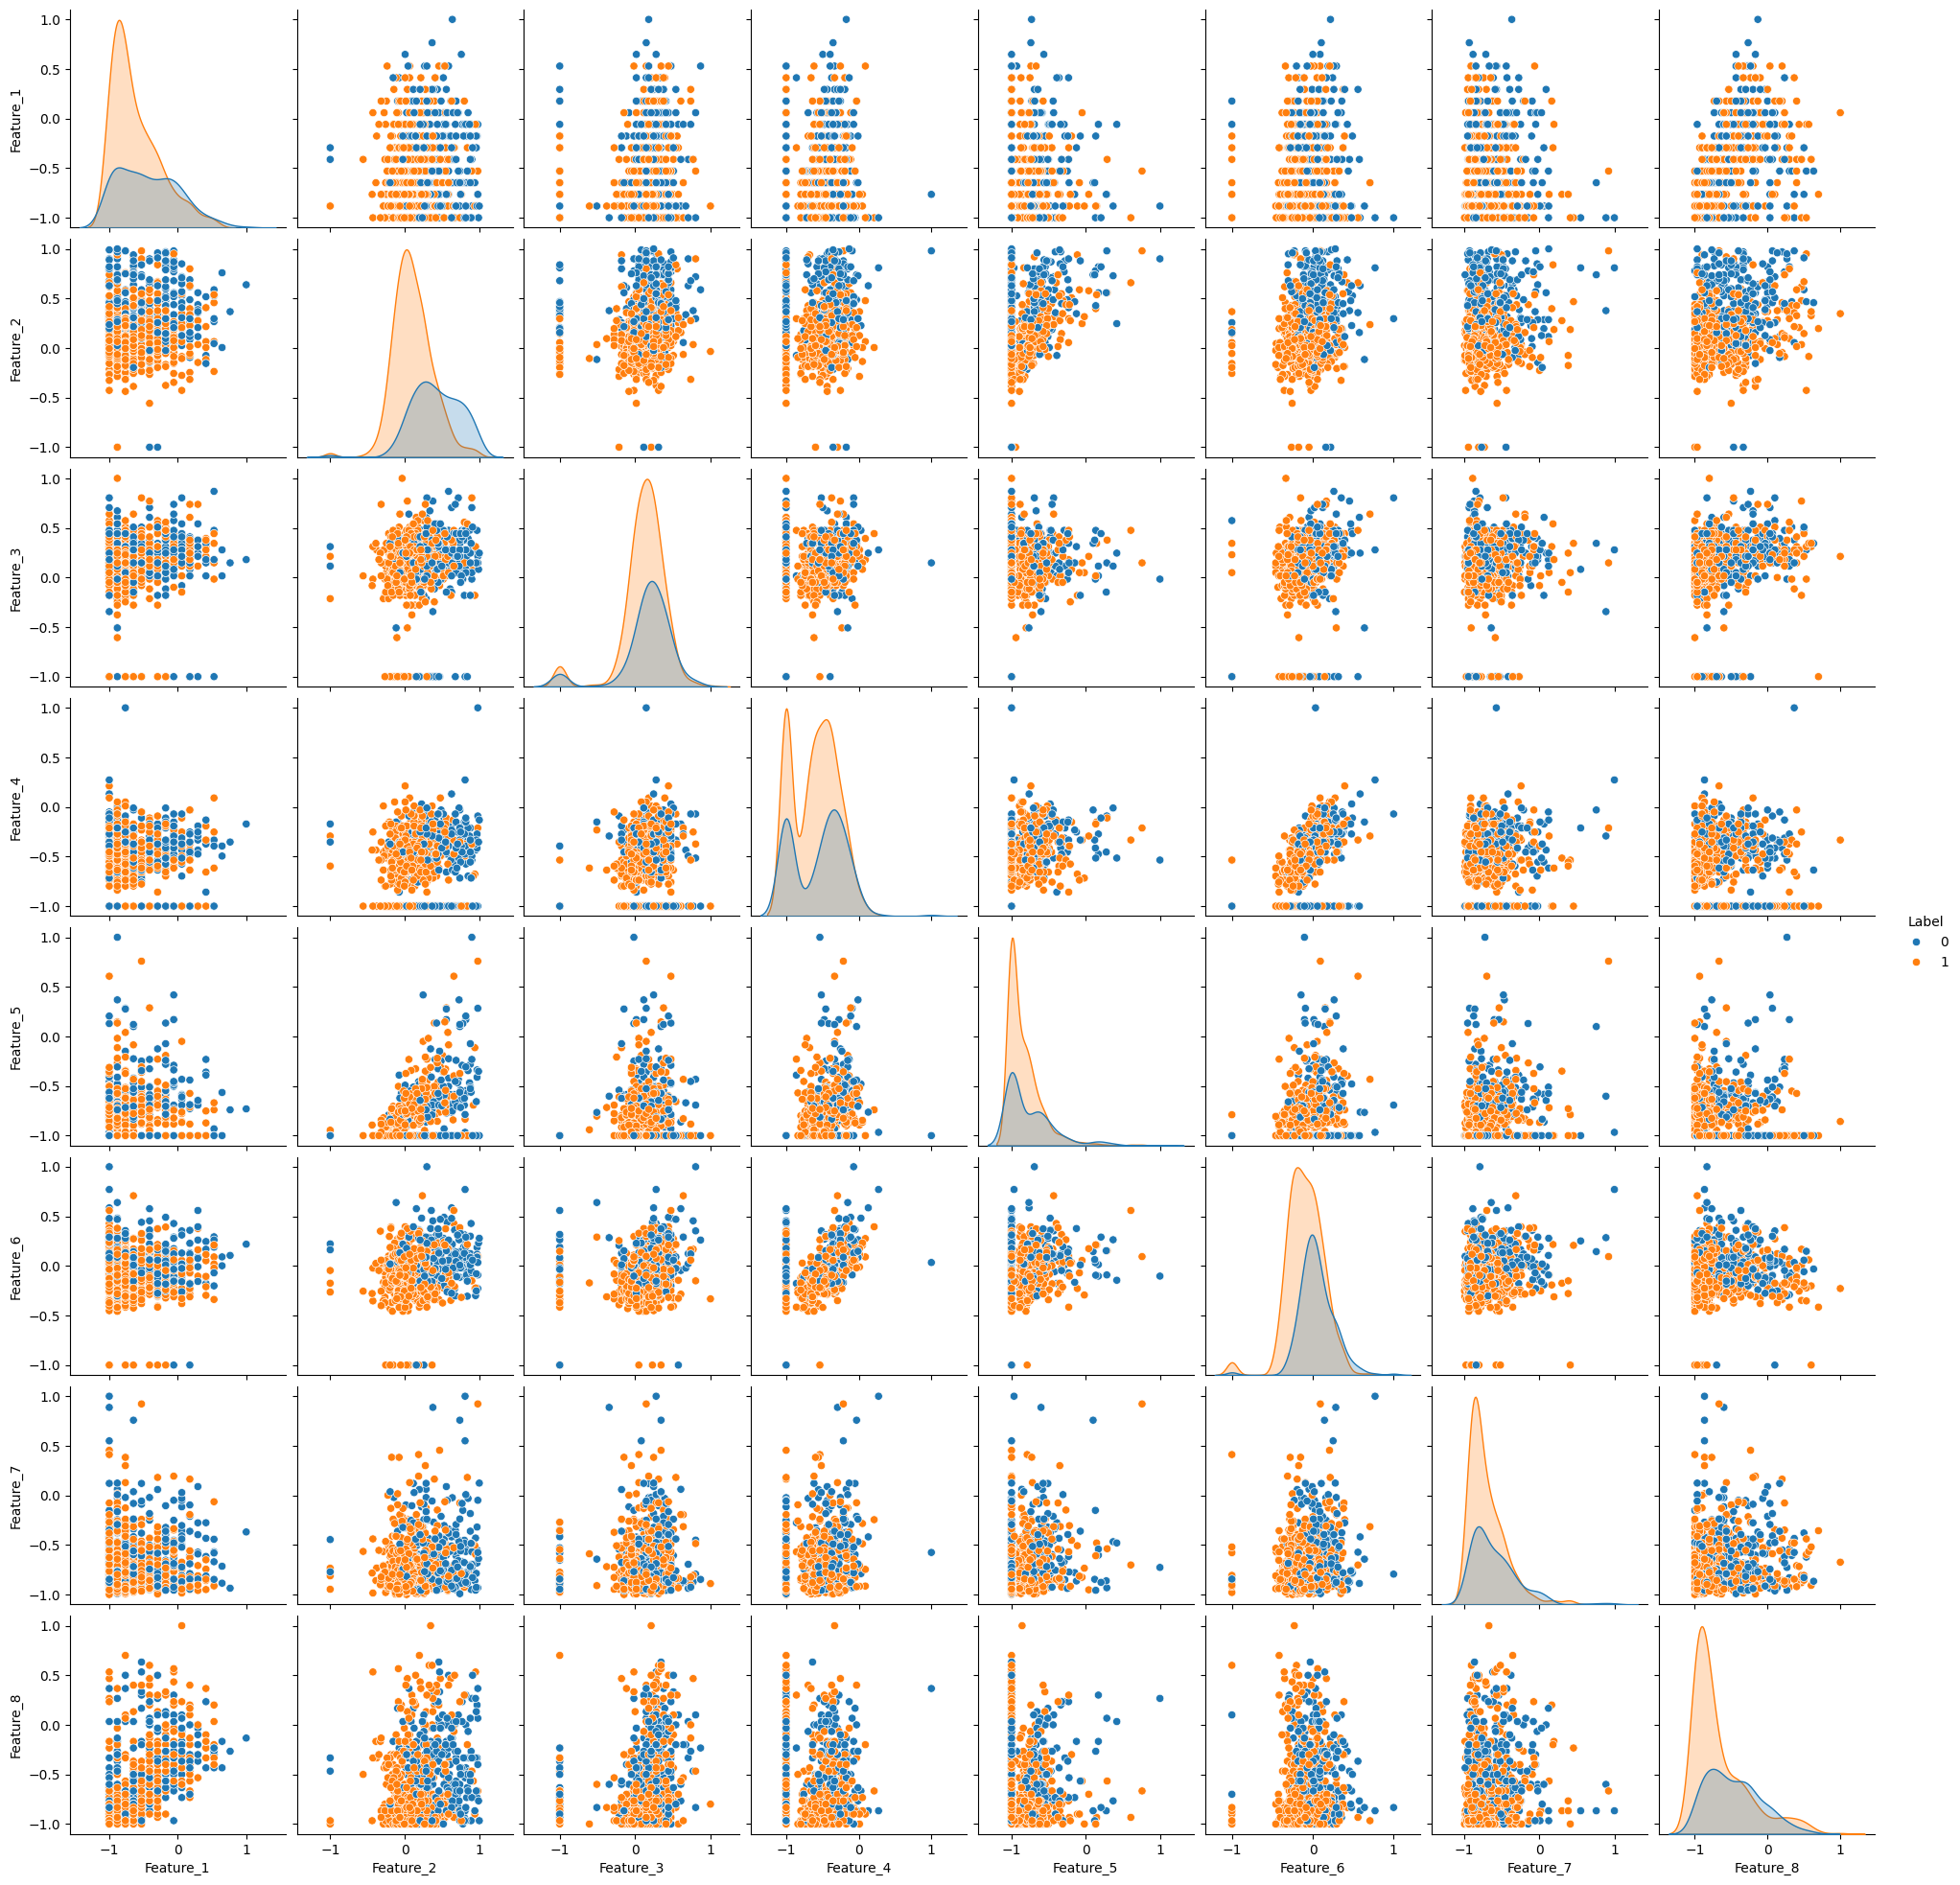

In [15]:
sns.pairplot(df, vars=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4','Feature_5','Feature_6','Feature_7','Feature_8'], hue='Label')
plt.show()

#### After Quantile transformation

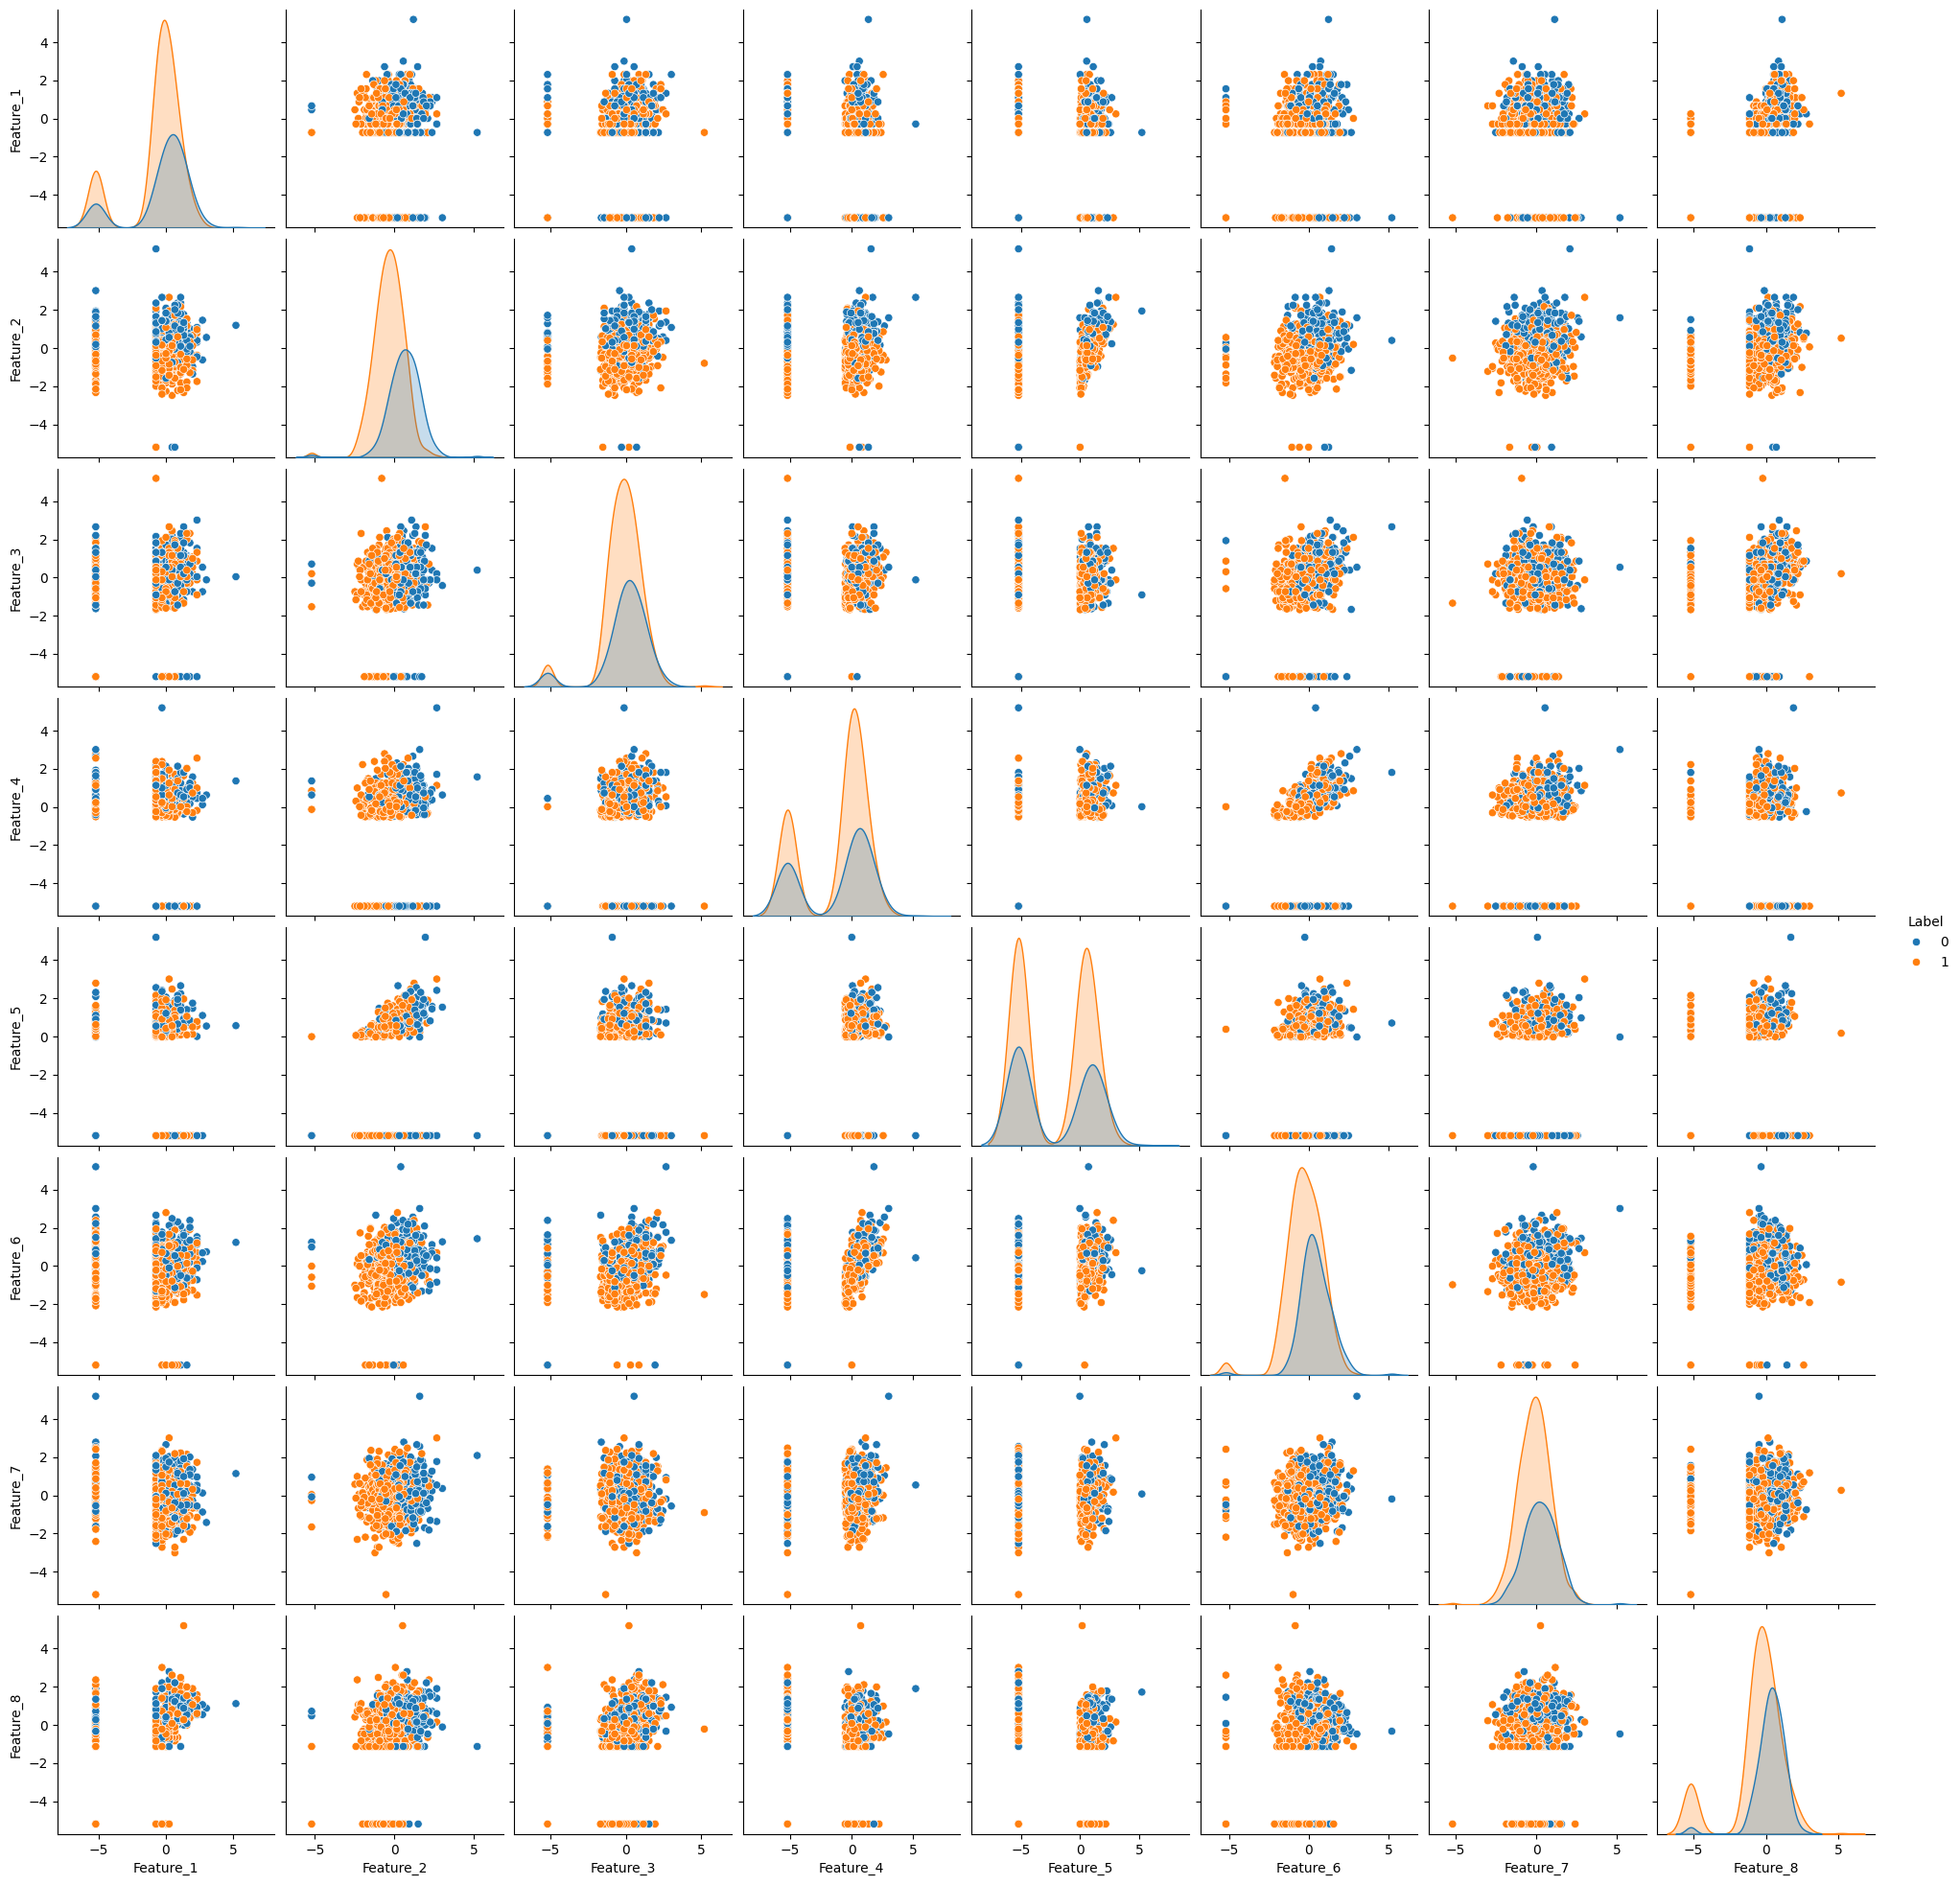

In [16]:
sns.pairplot(df_quantile_scaled, vars=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4','Feature_5','Feature_6','Feature_7','Feature_8'], hue='Label')
plt.show()

## Tensorflow

#### Importing necessary libraries

In [2]:
import numpy as np
import random
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, classification_report, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,AdamW
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight

#### Base model

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4912 - loss: 1.1108 - val_accuracy: 0.4959 - val_loss: 1.0196
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5142 - loss: 1.0485 - val_accuracy: 0.4959 - val_loss: 0.9743
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.9981 - val_accuracy: 0.5041 - val_loss: 0.9356
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5442 - loss: 0.9550 - val_accuracy: 0.5366 - val_loss: 0.9012
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 0.9171 - val_accuracy: 0.5447 - val_loss: 0.8700
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5627 - loss: 0.8831 - val_accuracy: 0.5691 - val_loss: 0.8414
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.8524 - val_accuracy: 0.5610 - val_loss: 0.8152
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5923 - loss: 0.8245 - val_accuracy: 0.5854 - v

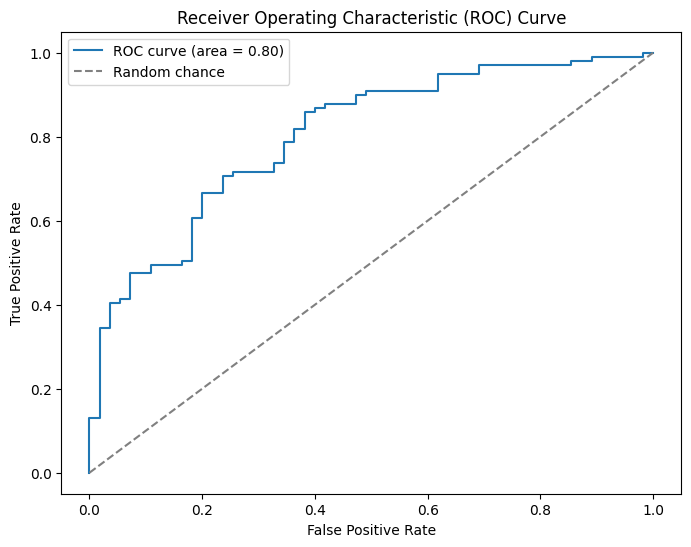

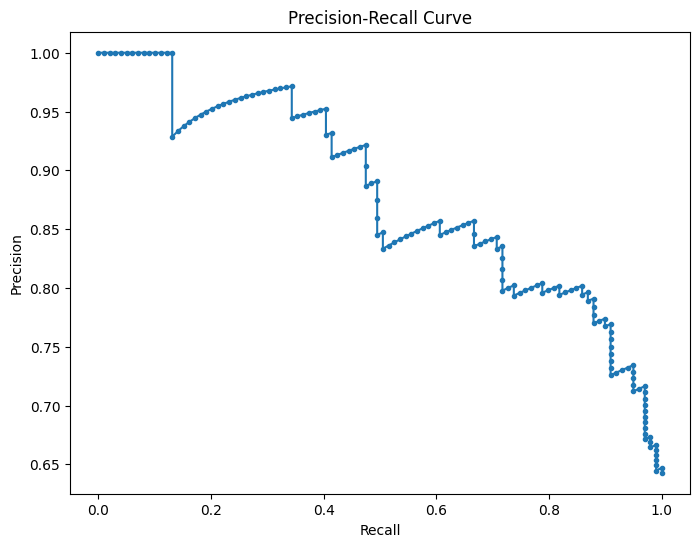

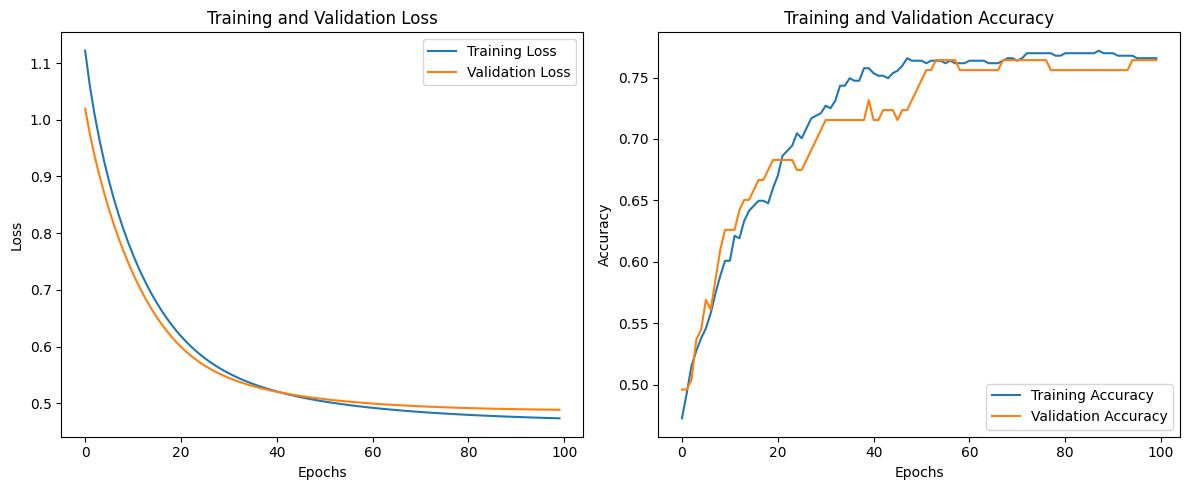

In [18]:
# setting seeds for reproducability
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seeds(42)
X_scaled = df_quantile_scaled.iloc[:, :-1].values
y_scaled = df_quantile_scaled['Label'].values
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Base Perceptron model using Keras
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# F1 score
f1 = f1_score(y_test, y_pred_class)
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred_class))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
# Plots
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random chance')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

#Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#   Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Multiple layers

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5837 - loss: 0.7015 - val_accuracy: 0.6098 - val_loss: 0.6637
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 0.8280 - val_accuracy: 0.6098 - val_loss: 0.6595
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5563 - loss: 0.7667 - val_accuracy: 0.6098 - val_loss: 0.6573
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 0.7941 - val_accuracy: 0.6098 - val_loss: 0.6563
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5448 - loss: 0.7440 - val_accuracy: 0.6179 - val_loss: 0.6547
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 0.7243 - val_accuracy: 0.6179 - val_loss: 0.6536
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6239 - loss: 0.6945 - val_accuracy: 0.6098 - val_loss: 0.6522
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5867 - loss: 0.6883 - val_accuracy: 0.6098 - val_loss: 0.6510

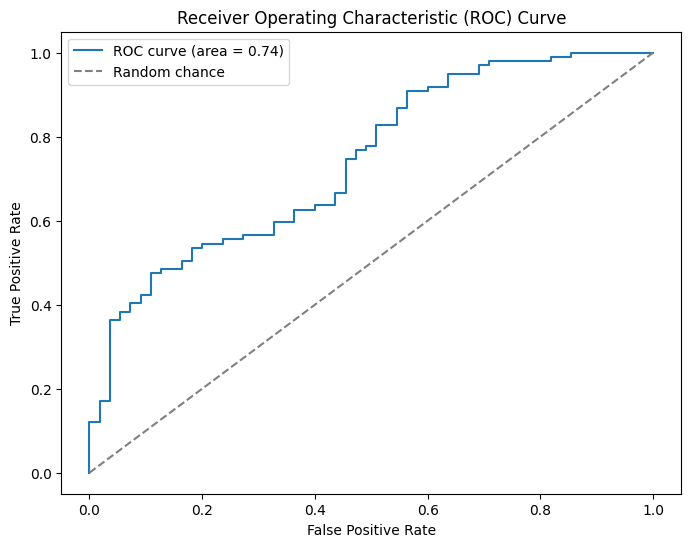

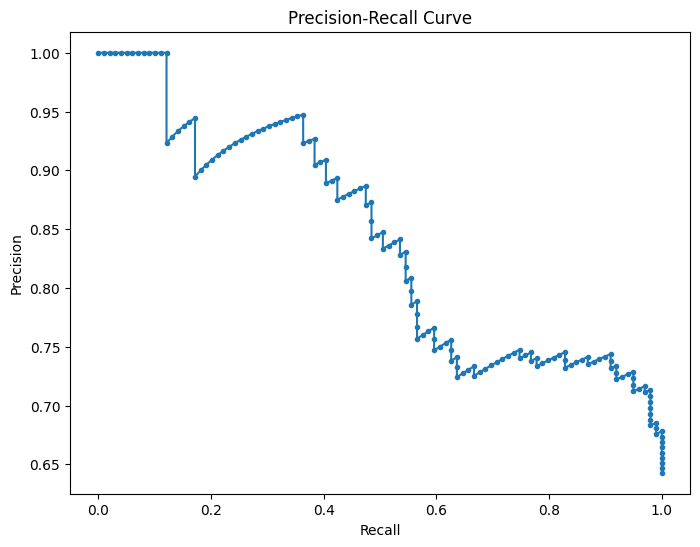

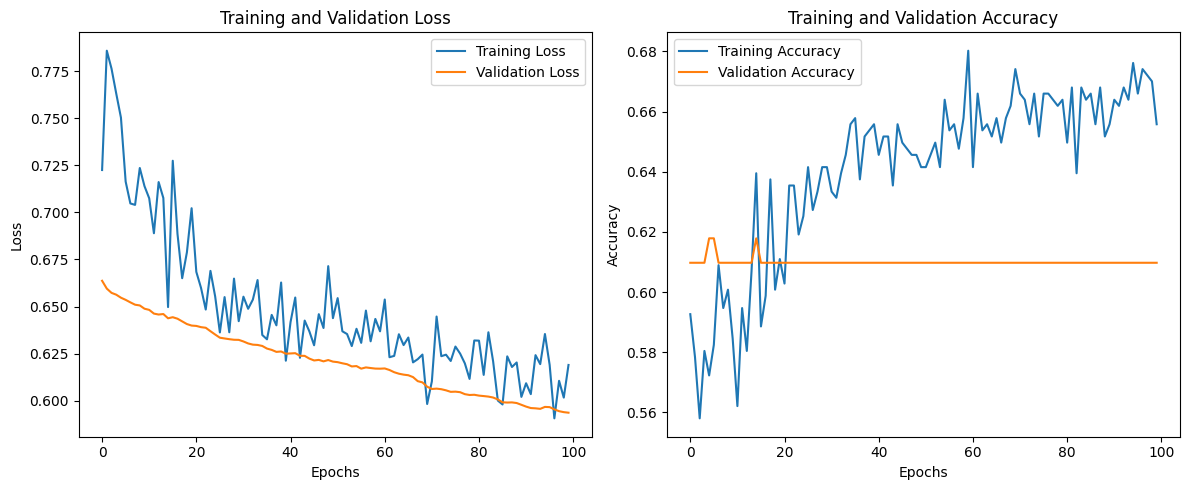

In [33]:
set_seeds(42)

# Assuming df_quantile_scaled is your DataFrame with features and 'Label' as the target variable
X_scaled = df_quantile_scaled.iloc[:, :-1].values
y_scaled = df_quantile_scaled['Label'].values

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Base Perceptron model with multiple hidden layers using Keras
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

# Adding multiple hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Another dropout layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# F1 score with zero_division to avoid undefined metric
f1 = f1_score(y_test, y_pred_class, zero_division=0)
print(f"F1 Score: {f1:.2f}")

# Classification report with zero_division to handle warnings
report = classification_report(y_test, y_pred_class, zero_division=0)
print(report)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plots
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random chance')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Training accuracy and loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Enchanced model(One Hidden layer)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5343 - loss: 1.0235 - val_accuracy: 0.7073 - val_loss: 0.7282
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6444 - loss: 0.8014 - val_accuracy: 0.6911 - val_loss: 0.6430
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.6442 - val_accuracy: 0.6992 - val_loss: 0.6156
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6517 - loss: 0.6592 - val_accuracy: 0.6992 - val_loss: 0.6012
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6856 - loss: 0.6111 - val_accuracy: 0.7073 - val_loss: 0.5879
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7022 - loss: 0.5910 - val_accuracy: 0.6829 - val_loss: 0.5656
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.5919 - val_accuracy: 0.7073 - val_loss: 0.5585
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.5612 - val_accuracy: 0.7154 - 

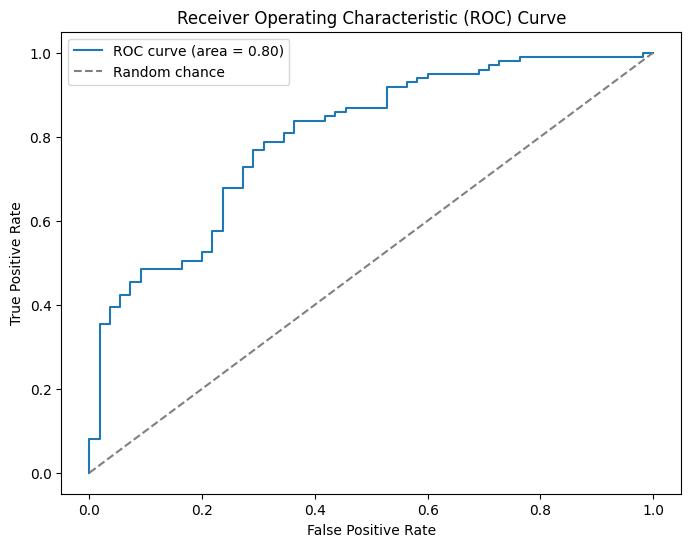

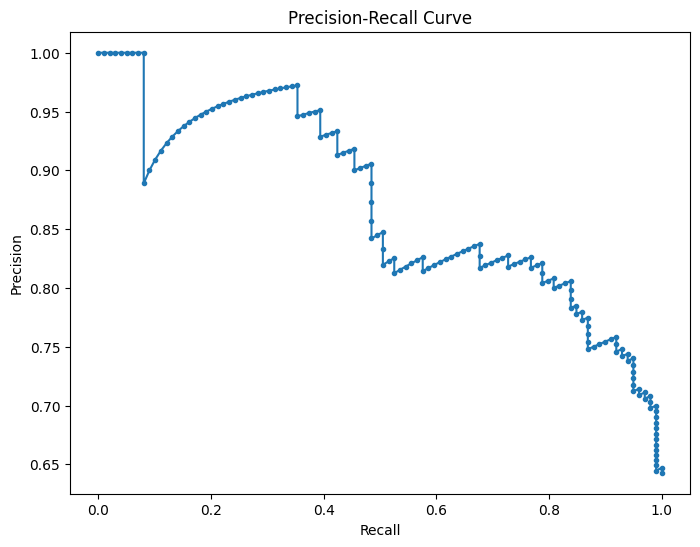

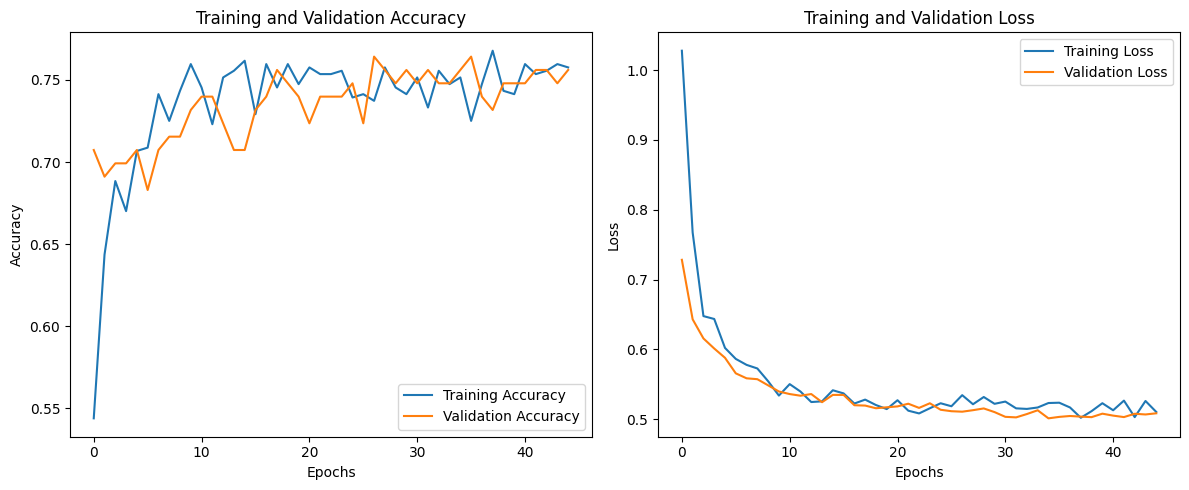

In [77]:
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seeds(42)

# Perceptron model using Keras (added layers and dropouts)
model = Sequential()
model.add(Dense(8, activation='relu',kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5)) 

model.add(Dense(1, activation='sigmoid'))

# Compile the model using Adam optimizer
model.compile(optimizer=AdamW(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2,callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

#ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# F1 score
f1 = f1_score(y_test, y_pred_class)
print(f"F1 Score: {f1:.2f}")

print(classification_report(y_test, y_pred_class))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plots
# ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random chance')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

#Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#   Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Advanced Perceptron Model with Enhancements (Two layer)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4949 - loss: 1.4752 - val_accuracy: 0.3577 - val_loss: 0.8043
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5017 - loss: 1.4368 - val_accuracy: 0.4228 - val_loss: 0.7783
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 1.3380 - val_accuracy: 0.4715 - val_loss: 0.7543
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5004 - loss: 1.3325 - val_accuracy: 0.5203 - val_loss: 0.7353
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 1.2606 - val_accuracy: 0.5772 - val_loss: 0.7162
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 1.1070 - val_accuracy: 0.5854 - val_loss: 0.7056
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 1.0402 - val_accuracy: 0.5691 - val_loss: 0.6976
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 1.0009 - val_accuracy: 0.5935 - 

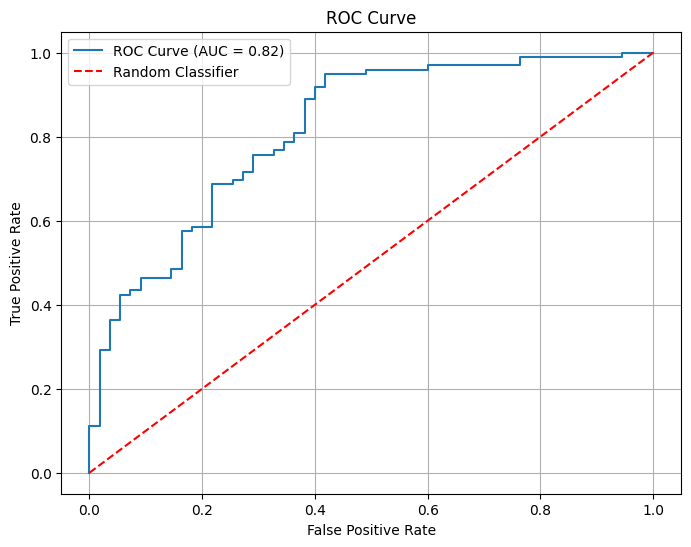

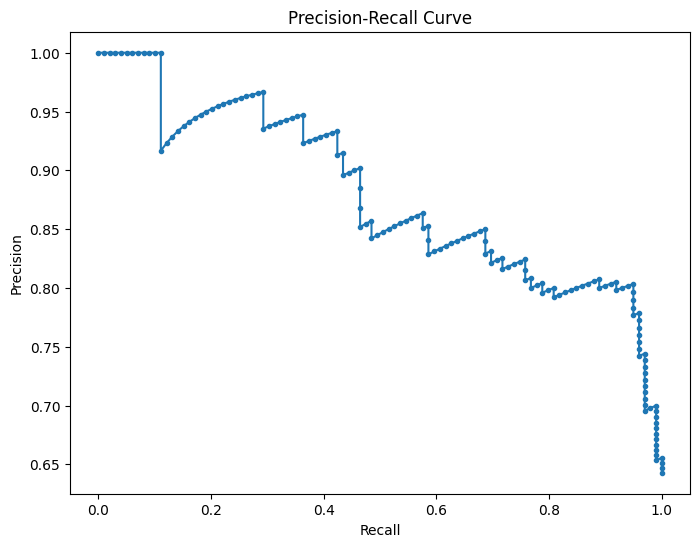

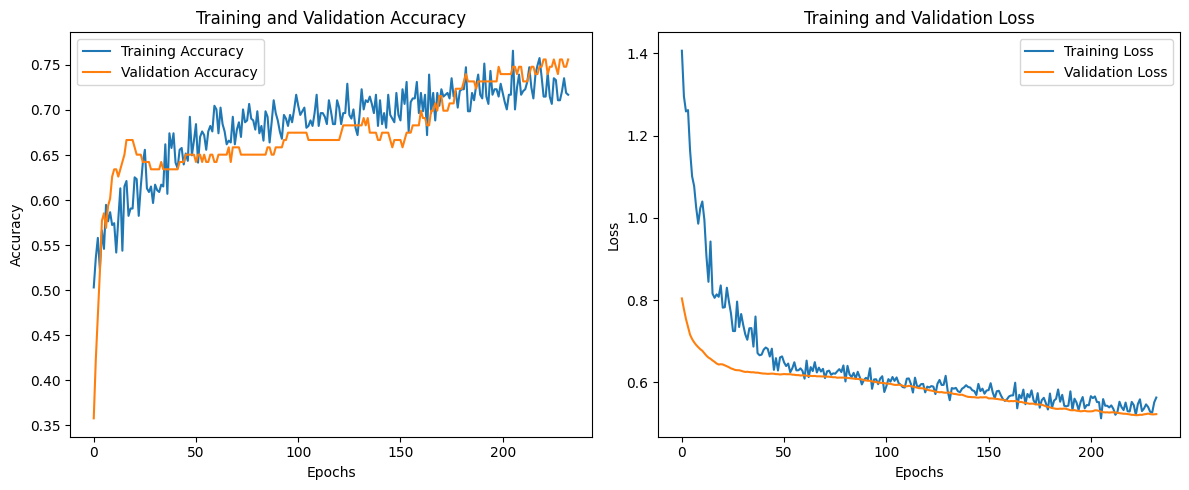

In [27]:
def set_seeds(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seeds(42)

# Load the dataset


# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

# Compile the model using Adam optimizer with weight decay (AdamW)
model.compile(optimizer=AdamW(learning_rate=0.00125), loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Predict probabilities
y_pred = model.predict(X_test).ravel()

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, (y_pred > 0.5).astype(int))

# Print classification report
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
